<a href="https://colab.research.google.com/github/kongenikhil/Kaggle_DataSet_Files/blob/master/Netflix_Content_offerings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('174T-bvR9lkjVSDQVNJxUuokaOHbzYZfK')

# Project Title - Analysis of Netflix Show Data

TODO - This dataset has been obtained from kaggle , the source of the data being Flixable , a third party search engine for Netflix. In this project , various analysis will be performed on this data to get insights into the type of content being added to the Netfil Collection. 

Note : I would like to thank Jovian for giving a platform and this wonderful oppurtunity to work on these real world projects.

## Downloading the Dataset

**TODO** - The dataset is derieved from kaggle. it can be downloaded  with the insertion of url in the below code cell. The only requirement is to insert our kaggle username and the Key (available in your kaggle profile settings. ).

In [4]:
!pip install jovian opendatasets --upgrade --quiet
!pip install wordcloud

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "netflix-show-analysis" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)


[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/kongenikhil/netflix-show-analysis


'https://jovian.ml/kongenikhil/netflix-show-analysis'

In [11]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning :

We will try to remove any data not required for our analysis . 


In [69]:
show_data = pd.read_csv('./netflix-shows/netflix_titles.csv')

In [70]:
show_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [71]:
show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [72]:
print(show_data.describe())
show_data.shape

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000


(6234, 12)

In [73]:
show_data.head()
# converting date_added column  to pandas datetime format ( its cuttently in string format) 
show_data['date_added'] = pd.to_datetime(show_data['date_added'])



In [74]:
# We will drop unnnecessary columns not needed for analysis 
show_data.drop(['show_id'],inplace=True,axis=1)

In [75]:
import jovian

In [76]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/kongenikhil/netflix-show-analysis


'https://jovian.ml/kongenikhil/netflix-show-analysis'

# Exploratory Analysis and Visualization

**TODO** - In this section , relationships and value ditributions in various distributions will be analysed and visualized with help of charts .
 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [77]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Lets explore how many movies and Tv shows are their in Netflix by drawing a bar chart to show the distribution

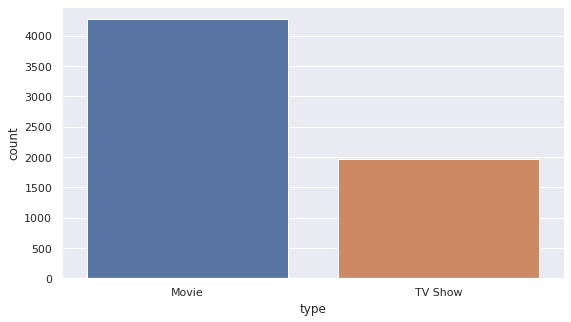

In [78]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=show_data)


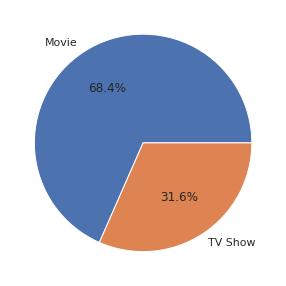

In [79]:
pct_labels = list(show_data['type'].value_counts().index)
pct_value = (show_data['type'].value_counts().values)
plt.pie(pct_value,labels=pct_labels,autopct='%1.1f%%')
plt.show()



1.   From the above graph it is evident that netflix almost has twice as many movies as it has TV Shows

2. The Pie chart tell us that almost 68 % content is Movie



**TODO** - Now we check how many Movies and Tv series were released year wise 

In [80]:
show_data['year_added'] = show_data['date_added'].apply(lambda x : (x.year))
show_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,NaN
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN


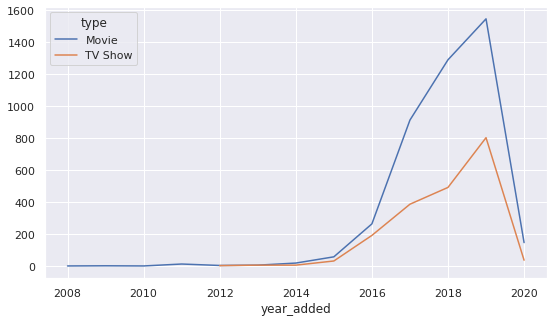

In [81]:
data = show_data[['year_added','type']].value_counts()
data = data.unstack()
data.plot()



1.   The above graph tell us that the rate of addition of movies is far 
     higher than rate of addition of TV series
2.   The content offerings have sky rockeckted from year 2018 to       present 



**TODO** - Lets check the average run time and distribution of movies , as well as length of TV series ( no of seasons it lasts ) 

In [82]:
movie_runtime = show_data.loc[show_data['type']=='Movie',['type','duration']]
# lets remove the 'min' in duration so we can analyse it 
movie_runtime['duration'] = movie_runtime['duration'].apply(lambda x : int(x.split()[0]))

# TV series 
tv_runtime = show_data.loc[show_data['type']!='Movie',['type','duration']]
tv_runtime['duration'] = tv_runtime['duration'].apply(lambda x : int(x.split()[0]))
tv_runtime , movie_runtime

(         type  duration
 2     TV Show         1
 3     TV Show         1
 5     TV Show         1
 8     TV Show         1
 26    TV Show         1
 ...       ...       ...
 6228  TV Show         2
 6229  TV Show        13
 6230  TV Show         4
 6232  TV Show         2
 6233  TV Show        10
 
 [1969 rows x 2 columns],        type  duration
 0     Movie        90
 1     Movie        94
 4     Movie        99
 6     Movie       110
 7     Movie        60
 ...     ...       ...
 5577  Movie        70
 5578  Movie       102
 5579  Movie        88
 5580  Movie       109
 6231  Movie        60
 
 [4265 rows x 2 columns])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


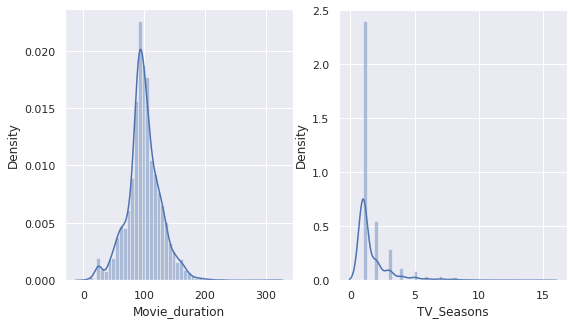

In [83]:
# plotting the distribution of movie runtime 
fig, ax =plt.subplots(1,2)

sns.distplot(movie_runtime['duration'],ax=ax[0],axlabel='Movie_duration')
sns.distplot(tv_runtime['duration'],ax=ax[1],axlabel='TV_Seasons')
fig.show()



1.   From the above graph we conclude that most of the duration of the movies is centred about 100 to 120 min
2.   We also can tell that many TV series have only one season



**TODO** - Lets explore the ratings of the offerings in the  content

In [84]:
ratings_count = show_data['rating']

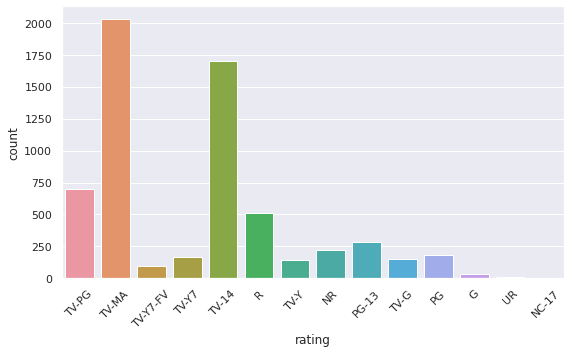

In [85]:
sns.countplot(x=ratings_count)
plt.xticks(rotation=45)
plt.show()



1.   From the above graph we can infer that TV - MA is the highest type of content available 
2.   The TV-MA ratings mean that the shows are only suitable for mature audiences , ideally above 17 years of age. 
3. Hence we conclude that netflix is adding a lot o content for adults rather than children 



**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [86]:
import itertools
from collections import Counter
list_of_countries = show_data['country'].dropna().astype('str').str.split(", ")
# This list contains all the countries mentioned in the 'country' columns 
list_of_countries



0       [United States, India, South Korea, China]
1                                 [United Kingdom]
2                                  [United States]
3                                  [United States]
4                                  [United States]
                           ...                    
6227                                   [Australia]
6229                               [United States]
6230                               [United States]
6232                              [United Kingdom]
6233                               [United States]
Name: country, Length: 5758, dtype: object

United States     2609
India              838
United Kingdom     601
Canada             318
France             271
Japan              231
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          126
China              120
Hong Kong           97
Turkey              87
Taiwan              75
Argentina           68
Italy               67
Brazil              66
Belgium             66
Thailand            56
dtype: int64


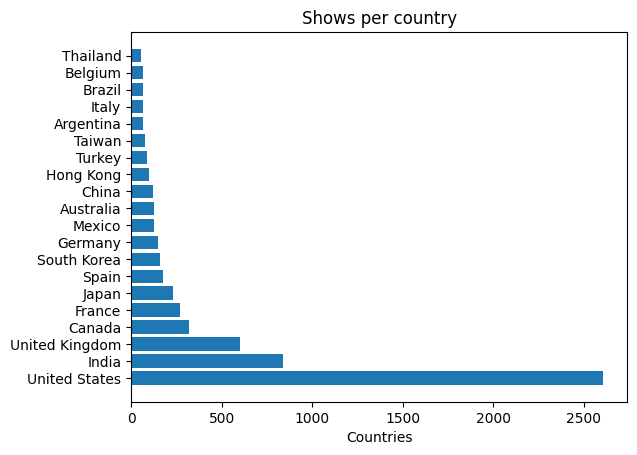

In [87]:
# The counter variable contains the list of countries and the number of times they occur
# we also flatten the list obtained in the above operation
counter = Counter(list(itertools.chain.from_iterable(list_of_countries))) # The counter object gives a dictionary with country name as key 
counter_series = pd.Series(counter).sort_values(ascending=False).head(20)  # and the number of times it occurs as its value
print(counter_series)
# Taking top 20 countries as there are too many countries to interpret graph properly
plt.rcdefaults()
fig, ax = plt.subplots()
x_axis = counter_series.index
y_pos = counter_series.values
ax.barh( x_axis, y_pos, align='center')
ax.set_xlabel('Countries')
ax.set_title('Shows per country')
plt.show()




1.   From the above graph we interpret the Netflix creates the maximum number of shows for the US audience
2.   US is followed by India and then UK and Canada



Let us save and upload our work to Jovian before continuing

In [88]:
import jovian

In [89]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/kongenikhil/netflix-show-analysis


'https://jovian.ml/kongenikhil/netflix-show-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - What category of content has been added ? Examine the lowest and the maximum category for TV shows and Movies 

In [90]:
tv_shows = show_data.loc[show_data['type']=='TV Show']
movies = show_data.loc[show_data['type']!='TV Show']

In [91]:
# tv_shows
category_list_tv = tv_shows['listed_in'].dropna().str.split(', ')
category_list_movies = movies['listed_in'].dropna().str.split(', ')
category_list_tv

2                                              [Kids' TV]
3                                              [Kids' TV]
5       [Crime TV Shows, International TV Shows, Spani...
8                       [Docuseries, Science & Nature TV]
26      [International TV Shows, Romantic TV Shows, TV...
                              ...                        
6228                                           [Kids' TV]
6229    [TV Action & Adventure, TV Comedies, TV Sci-Fi...
6230                                        [TV Comedies]
6232           [British TV Shows, TV Comedies, TV Dramas]
6233                     [Classic & Cult TV, TV Comedies]
Name: listed_in, Length: 1969, dtype: object

Counter({'International TV Shows': 1001, 'TV Dramas': 599, 'TV Comedies': 436, 'Crime TV Shows': 363, "Kids' TV": 328, 'Docuseries': 279, 'Romantic TV Shows': 278, 'British TV Shows': 210, 'Reality TV': 153, 'Korean TV Shows': 132, 'TV Action & Adventure': 126, 'Spanish-Language TV Shows': 117, 'Anime Series': 117, 'TV Mysteries': 69, 'TV Sci-Fi & Fantasy': 68, 'Science & Nature TV': 67, 'TV Horror': 54, 'TV Thrillers': 44, 'Teen TV Shows': 44, 'Stand-Up Comedy & Talk Shows': 42, 'Classic & Cult TV': 24, 'TV Shows': 10})


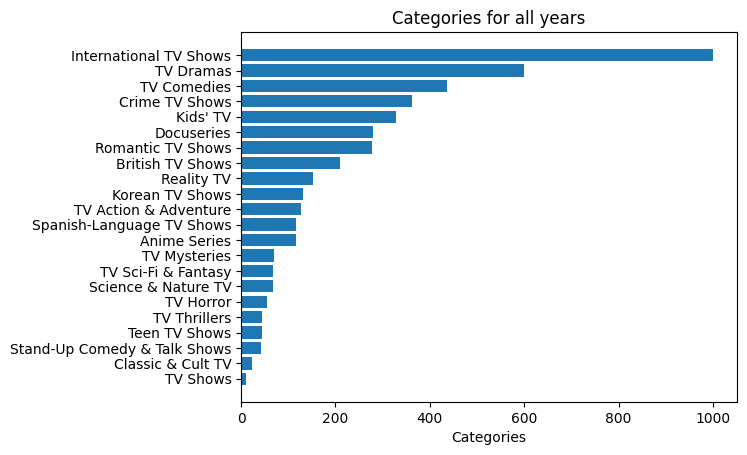

In [92]:


tv_cat_counter = Counter(list(itertools.chain.from_iterable(category_list_tv)))
print(tv_cat_counter)
tv_cat_counter = pd.Series(tv_cat_counter).sort_values(ascending=True)
tv_cat_counter
plt.rcdefaults()
fig, ax = plt.subplots()
x_axis = tv_cat_counter.index
y_pos = tv_cat_counter.values
ax.barh( x_axis, y_pos, align='center')
ax.set_xlabel('Categories')
ax.set_title('Categories for all years')
plt.show()


Counter({'International Movies': 1927, 'Dramas': 1623, 'Comedies': 1113, 'Documentaries': 668, 'Action & Adventure': 597, 'Independent Movies': 552, 'Thrillers': 392, 'Children & Family Movies': 378, 'Romantic Movies': 376, 'Stand-Up Comedy': 281, 'Horror Movies': 262, 'Music & Musicals': 243, 'Sci-Fi & Fantasy': 193, 'Sports Movies': 157, 'Classic Movies': 84, 'LGBTQ Movies': 60, 'Movies': 56, 'Cult Movies': 55, 'Faith & Spirituality': 47, 'Anime Features': 45})


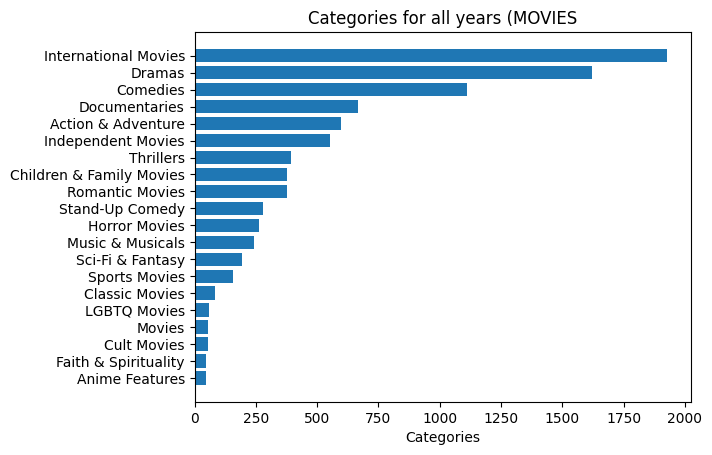

In [93]:

Movie_cat_counter = Counter(list(itertools.chain.from_iterable(category_list_movies)))
print(Movie_cat_counter)
Movie_cat_counter = pd.Series(Movie_cat_counter).sort_values(ascending=True)

plt.rcdefaults()
fig, ax = plt.subplots()
x_axis = Movie_cat_counter.index
y_pos = Movie_cat_counter.values
ax.barh( x_axis, y_pos, align='center')
ax.set_xlabel('Categories')
ax.set_title('Categories for all years (MOVIES')
plt.show()



1.   The term international TV show does not offer us much details
2.   We can conclude that the next three most added categories are Dramas , Comedies and Crime shows
3. The least type of tv shows to be added were Classic , Cult, Stand-ups and Talk shows


#### Q2: TODO - What words or letters pop up during the description , this may give us insight into exactly what kind of stories are most present at Netflix 

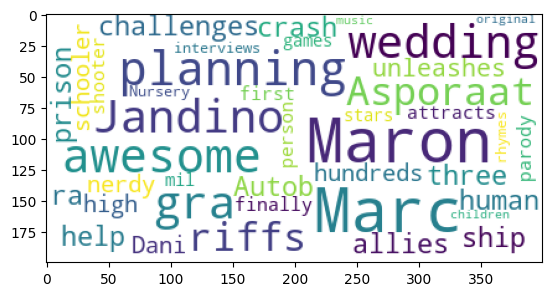

In [94]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

description = str((show_data['description']))
wordcloud = WordCloud(max_font_size=50, max_words=40,background_color="white").generate((description))
plt.imshow(wordcloud)



1.   some words high , grade ,scholl ,allies , wedding shooter 
tell us that most of the series are based on high school students , or action packed or even parodies.
2. This data sits good woth our above analysis that after international shows most other type of content are Drama , comedies and Crime Shows. 
3.   Also many of the words do not make much sense as they appear to be partial texts. 



#### Q3: TODO - Which are the longest running shows , and which ones were the shortest ?? 

In [95]:
tv_shows['duration'] = tv_shows['duration'].apply(lambda x : int(x.split(' ')[0]))
movies['duration'] = movies['duration'].apply(lambda x : int(x.split(' ')[0]))
# Movie with the longest duration 
longest_movie = movies.sort_values(by=['duration'],ascending=False).iloc[0]
print('Movie with the longest duration on netflix is {} with a duration of {} min'.format(longest_movie['title'],longest_movie['duration']))

Movie with the longest duration on netflix is Black Mirror: Bandersnatch with a duration of 312 min


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


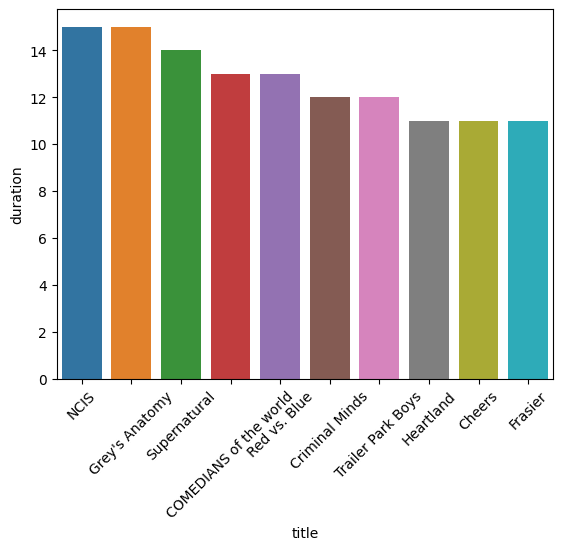

In [96]:
# Longest running shows ( Most Number of seasons ) -- Taking the Top ten
longest = tv_shows.sort_values(by=['duration'],ascending=False)[:10] 
x_axis = longest['title']
y_axis = longest['duration']
sns.barplot(x=x_axis,y=y_axis)
plt.xticks(rotation=45)
plt.show()


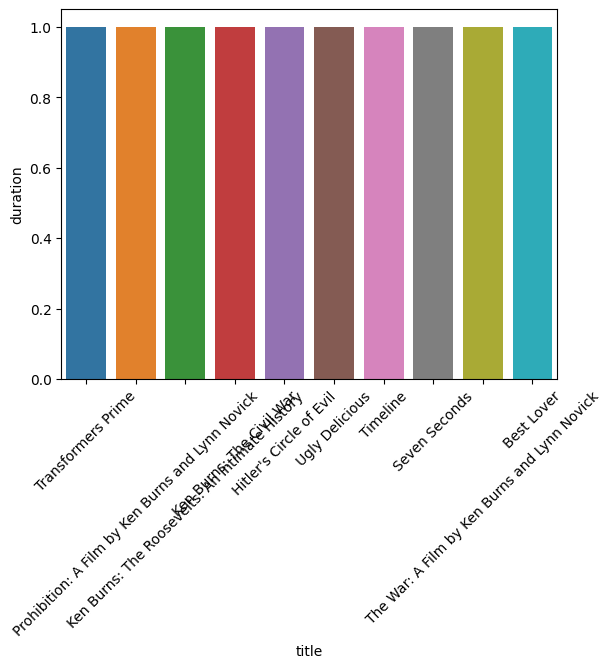

In [97]:
# seasons with the least number of shows 
longest = tv_shows.sort_values(by=['duration'],ascending=True)[:10] 
x_axis = longest['title']
y_axis = longest['duration']
sns.barplot(x=x_axis,y=y_axis)
plt.xticks(rotation=45)
plt.show()



1.   The TV Show NCIS , Grey Anantomy and Supernatural are among the longest running shows 
2.   There are a lot of Tv shows with just one season and hence no few shows can be shortlisted. 



#### Q4: TODO - Which director's works have been the most featured on Netflix ??


In [98]:
directors_list_TV_shows = show_data.loc[show_data['type']=='TV Show','director'].dropna().str.split(',')
directors_list_Movies   = show_data.loc[show_data['type']!='TV Show','director'].dropna().str.split(',')

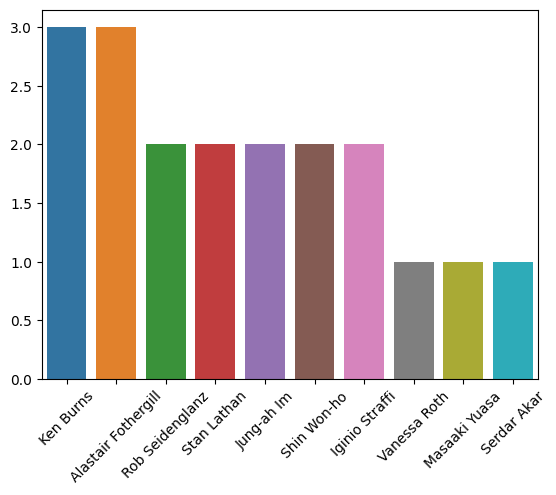

In [99]:
list_TV_shows = Counter(list(itertools.chain.from_iterable(directors_list_TV_shows)))
directors_series_TV_shows = pd.Series(list_TV_shows).sort_values(ascending=False).head(10)
# print(directors_list_TV_shows)
fig,ax = plt.subplots(1,1)
x_axis = directors_series_TV_shows.index
y_axis = directors_series_TV_shows.values
sns.barplot(x=x_axis,y=y_axis)
plt.xticks(rotation=45)
plt.show()


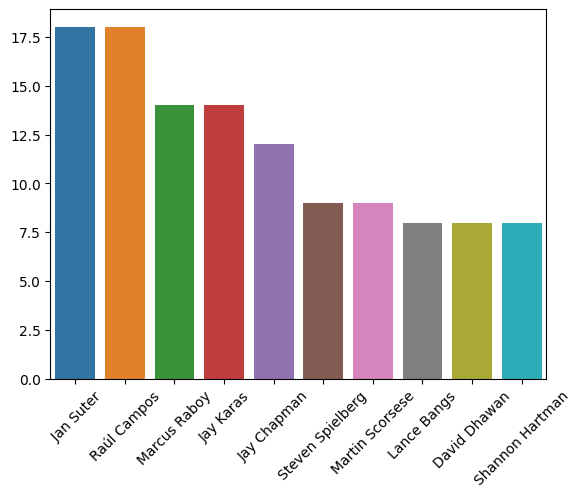

In [100]:
list_movies = Counter(list(itertools.chain.from_iterable(directors_list_Movies)))
directors_series_Movies = pd.Series(list_movies).sort_values(ascending=False).head(10)

x_axis = directors_series_Movies.index
y_axis = directors_series_Movies.values
sns.barplot(x=x_axis,y=y_axis)
plt.xticks(rotation=45)
plt.show()




1.   Ken burns and Alastair Fothergill lead the number of TV shows directed , by having directed 3 each.

2.   Jan Suter and Rauk Campos ( both directors produce movies in the Spanish laguages ) have the highest number of movies directed with 18 movies each at in the Netflix content library



Let us save and upload our work to Jovian before continuing.

In [101]:
import jovian

In [102]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/kongenikhil/netflix-show-analysis


'https://jovian.ml/kongenikhil/netflix-show-analysis'

## Inferences and Conclusion

**TODO** - 

### After thorough analysis of the data we can draw these inferences 



1.   Netflix has large numbers of movies when compared to number of TV shows. This is not surprising as Netflix initally started as DVD distributor of mainly movie DVD's
2.   The number of content offerings have risen sharply from 2016 to 2019 , and have seen a decrease in 2020 ( this sudden "decrease" can be explained as the year 2020 has not finished yet , and at time of gathering this data all new additions of this year could not be accounted for .)

3. Netflix majorly has been focused on  content for adults , this can be observed from the ratings of their content

4. A large number of content caters either to the US  or the Indian audience.

5. The Most category of content belongs to International shows , Comedies and dramas. This is true for both movies and tv shows

6. NCIS , Grays's Anatomy are the longest running TV shows on Netflix with each having 15 seasons.

7. The movie 'Black Mirror: Bandersnatch' has the highest duration of all movies listed with a runtime of 312 min.


Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [103]:
import jovian

In [104]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/kongenikhil/netflix-show-analysis


'https://jovian.ml/kongenikhil/netflix-show-analysis'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.



1.   https://chartio.com/learn/charts/stacked-bar-chart-complete-guide/
2.   https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

3. https://stackoverflow.com/questions/716477/join-list-of-lists-in-python
4. https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda



In [109]:
import jovian

In [ ]:
jovian.commit(project=project_name)